In [1]:
## collab user
# !pip install neuron
# !pip install netpyne
# !git clone https://github.com/suny-downstate-medical-center/S1_netpyne.git
# import os
# os.chdir('S1_netpyne/info')

In [2]:
import matplotlib
import os
os.chdir('../sim')

In [3]:
# !nrnivmodl mod/

In [4]:
"""
cfg.py 

Simulation configuration for S1 model (using NetPyNE)
This file has sim configs as well as specification for parameterized values in netParams.py 

Contributors: salvadordura@gmail.com, fernandodasilvaborges@gmail.com
"""

from netpyne import specs, sim
import pickle, json
import numpy as np

%matplotlib inline

cfg = specs.SimConfig()  

#------------------------------------------------------------------------------
#
# SIMULATION CONFIGURATION
#
#------------------------------------------------------------------------------

#------------------------------------------------------------------------------
# Run parameters
#------------------------------------------------------------------------------
cfg.duration = 2.0*1e2 ## Duration of the sim, in ms  
cfg.dt = 0.025
cfg.seeds = {'conn': 4321, 'stim': 4321, 'loc': 4321} 
cfg.hParams = {'celsius': 34, 'v_init': -65}  
cfg.verbose = False
cfg.createNEURONObj = True
cfg.createPyStruct = True  
cfg.cvode_active = False
cfg.cvode_atol = 1e-6
cfg.cache_efficient = True
cfg.printRunTime = 0.1

cfg.includeParamsLabel = False
cfg.printPopAvgRates = True

cfg.checkErrors = False

cfg.poptypeNumber = 55
cfg.celltypeNumber = 207

In [5]:
#------------------------------------------------------------------------------  
# S1 Cells
# Load 55 Morphological Names and Cell pop numbers -> L1:6 L23:10 L4:12 L5:13 L6:14
# Load 207 Morpho-electrical Names used to import the cells from 'cell_data/' -> L1:14 L23:43 L4:46 L5:52 L6:52
# Create [Morphological,Electrical] = number of cell metype in the sub-pop
with open('../info/anatomy/S1-cells-distributions-Rat.txt') as mtype_file:
	mtype_content = mtype_file.read()       

cfg.popNumber = {}
cfg.cellNumber = {} 
cfg.popLabel = {} 
popParam = []
cellParam = []
cfg.meParamLabels = {} 
for line in mtype_content.split('\n')[:-1]:
	metype, mtype, etype, n, m = line.split()
	cfg.cellNumber[metype] = int(n)
	cfg.popLabel[metype] = mtype
	cfg.popNumber[mtype] = int(m)

	if mtype not in popParam:
		popParam.append(mtype)
	cellParam.append(metype)

cfg.S1pops = popParam[0:55]
cfg.S1cells = cellParam[0:207]

#------------------------------------------------------------------------------  
cfg.popParamLabels = popParam[0:cfg.poptypeNumber] # to debug
cfg.cellParamLabels = cellParam[0:cfg.celltypeNumber] # to debug

In [6]:
#------------------------------------------------------------------------------
# Cells
#------------------------------------------------------------------------------

# TO DEBUG - import and simulate only the Cell soma (to study only the Net)
cfg.reducedtest = False    

# TO DEBUG - Create only 5 Cells for each MEtype in S1
cfg.oneCellperMEtypeS1 = False 

In [7]:
#------------------------------------------------------------------------------  
# TO DEBUG - Create only one Cell per MEtype in S1 cells
if cfg.oneCellperMEtypeS1:
	cfg.popNumber = {}
	cfg.cellNumber = {} 
	for mtype in cfg.S1pops:
		cfg.popNumber[mtype] = 0

	for line in mtype_content.split('\n')[:-1]:
		metype, mtype, etype, n, m = line.split()
		if int(n) < 5:
			cfg.cellNumber[metype] = int(n)
			cfg.popNumber[mtype] = cfg.popNumber[mtype] + int(n)
		else:
			cfg.cellNumber[metype] = 5
			cfg.popNumber[mtype] = cfg.popNumber[mtype] + 5


In [8]:
# testpop = ['L4_SS', 'L5_STPC', 'L5_UTPC', 'L23_LBC', 'L23_MC', 'L4_LBC', 'L4_MC', 'L5_LBC', 'L5_MC']
# Nsyn=513042, N=2684

In [9]:
subPopLabels = ['L23_MC', 'L4_LBC', 'L4_MC', 'L4_SS', 'L5_LBC', 'L5_STPC']

for metype in cfg.cellParamLabels:
    if cfg.popLabel[metype] in subPopLabels:
        print(metype,cfg.cellNumber[metype],cfg.popLabel[metype],cfg.popNumber[cfg.popLabel[metype]])        

L23_MC_bAC217 10 L23_MC 333
L23_MC_bNAC219 10 L23_MC 333
L23_MC_cACint209 270 L23_MC 333
L23_MC_cNAC187 33 L23_MC 333
L23_MC_dNAC222 10 L23_MC 333
L4_LBC_cACint209 22 L4_LBC 122
L4_LBC_cNAC187 14 L4_LBC 122
L4_LBC_cSTUT189 31 L4_LBC 122
L4_LBC_dNAC222 46 L4_LBC 122
L4_LBC_dSTUT214 9 L4_LBC 122
L4_MC_bAC217 11 L4_MC 118
L4_MC_bNAC219 4 L4_MC 118
L4_MC_cACint209 81 L4_MC 118
L4_MC_cNAC187 18 L4_MC 118
L4_MC_dNAC222 4 L4_MC 118
L4_SS_cADpyr230 406 L4_SS 406
L5_LBC_bAC217 12 L5_LBC 210
L5_LBC_cACint209 25 L5_LBC 210
L5_LBC_cIR216 13 L5_LBC 210
L5_LBC_cNAC187 37 L5_LBC 210
L5_LBC_cSTUT189 37 L5_LBC 210
L5_LBC_dNAC222 37 L5_LBC 210
L5_LBC_dSTUT214 49 L5_LBC 210
L5_STPC_cADpyr232 302 L5_STPC 302


In [10]:
#------------------------------------------------------------------------------  
cfg.S1pops = subPopLabels
cfg.S1cells = []
for metype in cfg.cellParamLabels:
    if cfg.popLabel[metype] in subPopLabels:        
        cfg.S1cells.append(metype)
        
cfg.thalamicpops = []

cfg.popParamLabels = cfg.S1pops
cfg.cellParamLabels = cfg.S1cells

In [11]:
#--------------------------------------------------------------------------
# Recording 
#--------------------------------------------------------------------------
cfg.allpops = cfg.popParamLabels
cfg.cellsrec = 0
if cfg.cellsrec == 0:  cfg.recordCells = cfg.allpops # record all cells
elif cfg.cellsrec == 1: cfg.recordCells = [(pop,0) for pop in cfg.allpops] # record one cell of each pop
elif cfg.cellsrec == 2: # record one cell of each cellMEtype (cfg.celldiversity = True)
	cfg.recordCells = []
	cellNumberLabel = 0 
	for metype in cfg.cellParamLabels:
		if metype in cfg.cellParamLabels:
			if cfg.cellNumber[metype] < 5:
				for numberME in range(cfg.cellNumber[metype]):
					cfg.recordCells.append((cfg.popLabel[metype],cellNumberLabel+numberME))
			else:
				for numberME in range(0,cfg.cellNumber[metype],int(cfg.cellNumber[metype]/4.5)):
					cfg.recordCells.append((cfg.popLabel[metype],cellNumberLabel+numberME))
			cellNumberLabel = cellNumberLabel + cfg.cellNumber[metype]
			if cellNumberLabel == cfg.popNumber[cfg.popLabel[metype]]:
				cellNumberLabel = 0 
                
cfg.recordTraces = {'V_soma': {'sec':'soma', 'loc':0.5, 'var':'v'}}  ## Dict with traces to record
cfg.recordStim = False			
cfg.recordTime = False  		
cfg.recordStep = 0.1    

In [12]:
#------------------------------------------------------------------------------
# Saving
#------------------------------------------------------------------------------
cfg.simLabel = 'subNets_test0'
cfg.saveFolder = '../info/test/'+cfg.simLabel
# cfg.filename =                	## Set file output name
cfg.savePickle = False         	## Save pkl file
cfg.saveJson = True	           	## Save json file
cfg.saveDataInclude = ['simConfig','simData'] ## , 'netParams', 'simConfig', 
cfg.backupCfgFile = None 		##  
cfg.gatherOnlySimData = False	##  
cfg.saveCellSecs = False			
cfg.saveCellConns = True	

In [13]:
"""
netParams.py
"""
# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

netParams.scale = 1.0 # Scale factor for number of cells
netParams.sizeX = 420.0 # x-dimension (horizontal length) size in um
netParams.sizeY = 2082.0 # y-dimension (vertical height or cortical depth) size in um
netParams.sizeZ = 420.0 # z-dimension (horizontal depth) size in um
netParams.shape = 'cylinder' # cylindrical (column-like) volume

# r = 210 um and hexagonal side length = 230.9 um

In [14]:
#------------------------------------------------------------------------------
# General network parameters
#------------------------------------------------------------------------------
# Layer	height (um)	height (norma)	from	to
# L1	165		    0.079		    0.000	0.079
# L2	149		    0.072		    0.079	0.151
# L3	353		    0.170		    0.151	0.320
# L4	190		    0.091		    0.320	0.412
# L5	525		    0.252		    0.412	0.664
# L6	700		    0.336		    0.664	1.000
# L23	502		    0.241		    0.079	0.320
# All	2082	    1.000	


cellModels = ['HH_full']
Epops = ['L23_PC', 'L4_PC', 'L4_SS', 'L4_SP', 
             'L5_TTPC1', 'L5_TTPC2', 'L5_STPC', 'L5_UTPC',
             'L6_TPC_L1', 'L6_TPC_L4', 'L6_BPC', 'L6_IPC', 'L6_UTPC']
Ipops = []
for popName in cfg.S1pops:
    if popName not in Epops:
        Ipops.append(popName)

Epops = []
for popName in cfg.S1pops:
    if popName not in Ipops:
        Epops.append(popName)   

layer = {'1':[0.0, 0.079], '2': [0.079,0.151], '3': [0.151,0.320], '23': [0.079,0.320], '4':[0.320,0.412], '5': [0.412,0.664], '6': [0.664,1.0], 
'longS1': [2.2,2.3], 'longS2': [2.3,2.4]}  # normalized layer boundaries


In [15]:
#------------------------------------------------------------------------------
# General connectivity parameters
#------------------------------------------------------------------------------
netParams.defaultThreshold = -10.0 # spike threshold, 10 mV is NetCon default, lower it for all cells
netParams.defaultDelay = 0.1 # default conn delay (ms)(M1: 2.0 ms)
netParams.propVelocity = 300.0 #  300 μm/ms (Stuart et al., 1997)(M1: 500.0um/ms)
netParams.scaleConnWeight = 0.001 # weight conversion factor (from nS to uS)
netParams.scaleConnWeightNetStims = 0.001  # weight conversion factor (from nS to uS)

In [16]:
#------------------------------------------------------------------------------
# Population parameters
#------------------------------------------------------------------------------
## S1
cfg.scaleDensity = 1.0

for popName in cfg.S1pops:
	layernumber = popName[1:2]
	if layernumber == '2':
		netParams.popParams[popName] = {'cellType': popName, 'cellModel': 'HH_full', 'ynormRange': layer['23'], 
                                        'numCells': int(np.ceil(cfg.scaleDensity*cfg.popNumber[popName])), 'diversity': True}
	else:
		netParams.popParams[popName] = {'cellType': popName, 'cellModel': 'HH_full', 'ynormRange': layer[layernumber], 
                                        'numCells': int(np.ceil(cfg.scaleDensity*cfg.popNumber[popName])), 'diversity': True}

In [17]:
## S1 cell property rules
cellnumber = 0    
for cellName in cfg.S1cells:
    
    if cfg.cellNumber[cellName] < 5:
        morphoNumbers = cfg.cellNumber[cellName]
    else:
        morphoNumbers = 5
    
    popName = cfg.popLabel[cellName]
    cellFraction = 1.0*cfg.cellNumber[cellName]/(morphoNumbers*cfg.popNumber[popName])
    
    for morphoNumber in range(morphoNumbers):
        cellMe = cellName + '_' + str(morphoNumber+1)
        ## Load cell rules previously saved using netpyne format
        netParams.loadCellParamsRule(label = cellMe, fileName = 'cell_data/' + cellMe + '/' + cellMe + '_cellParams.pkl')    
        netParams.renameCellParamsSec(label = cellMe, oldSec = 'soma_0', newSec = 'soma')

        cellRule = {'conds': {'cellType': popName}, 'diversityFraction': cellFraction, 'secs': {}}  # cell rule dict
        cellRule['secs'] = netParams.cellParams[cellMe]['secs']     
        cellRule['conds'] = netParams.cellParams[cellMe]['conds']    
        cellRule['conds']['cellType'] = popName
        cellRule['globals'] = netParams.cellParams[cellMe]['globals']       
        cellRule['secLists'] = netParams.cellParams[cellMe]['secLists']                 
        cellRule['secLists']['all'][0] = 'soma' # replace 'soma_0'
        cellRule['secLists']['somatic'][0]  = 'soma' # replace 'soma_0'
                              
        cellRule['secLists']['spiny'] = {}
        cellRule['secLists']['spinyEE'] = {}

        nonSpiny = ['axon_0', 'axon_1']
        cellRule['secLists']['spiny'] = [sec for sec in cellRule['secLists']['all'] if sec not in nonSpiny]
        nonSpinyEE = ['axon_0', 'axon_1', 'soma']
        cellRule['secLists']['spinyEE'] = [sec for sec in cellRule['secLists']['all'] if sec not in nonSpinyEE]

        #-----------------------------------------------------------------------------------#
        if cfg.reducedtest:
            cellRule['secs'] = {}
            cellRule['secs']['soma'] = netParams.cellParams[cellMe]['secs']['soma']
            cellRule['secLists']['spiny'] = ['soma']
            cellRule['secLists']['spinyEE'] = ['soma']
            cellRule['secLists']['all'] = ['soma']
            cellRule['secLists']['basal'] = ['soma']    
        #-----------------------------------------------------------------------------------#
        netParams.cellParams[cellMe] = cellRule   # add dict to list of cell params   
        cellnumber=cellnumber+1

In [18]:
#------------------------------------------------------------------------------
# Synaptic mechanism parameters  - mods from M1 detailed
#------------------------------------------------------------------------------
## S1
netParams.synMechParams['AMPA'] = {'mod':'MyExp2SynBB', 'tau1': 0.2, 'tau2': 1.74, 'e': 0}
netParams.synMechParams['NMDA'] = {'mod': 'MyExp2SynNMDABB', 'tau1NMDA': 0.29, 'tau2NMDA': 43, 'e': 0}
netParams.synMechParams['GABAA6'] = {'mod':'MyExp2SynBB', 'tau1': 0.2, 'tau2': 6.44, 'e': -80}
netParams.synMechParams['GABAA'] = {'mod':'MyExp2SynBB', 'tau1': 0.2, 'tau2': 8.3, 'e': -80}
netParams.synMechParams['GABAA10'] = {'mod':'MyExp2SynBB', 'tau1': 0.2, 'tau2': 10.4, 'e': -80}
netParams.synMechParams['GABAB'] = {'mod':'MyExp2SynBB', 'tau1': 3.5, 'tau2': 260.9, 'e': -93} 

ESynMech = ['AMPA', 'NMDA']
ISynMech = ['GABAA', 'GABAB']
ISynMech6 = ['GABAA6', 'GABAB']
ISynMech10 = ['GABAA10', 'GABAB']

In [19]:
#------------------------------------------------------------------------------
# load data from S1 conn pre-processing file 
#------------------------------------------------------------------------------
with open('conn/conn.pkl', 'rb') as fileObj: connData = pickle.load(fileObj)

lmat = connData['lmat']
a0mat = connData['a0mat']
d0 = connData['d0']
dfinal = connData['dfinal']
pmat = {}
pmat[12.5] = connData['pmat12um']
pmat[25] = connData['pmat25um']
pmat[50] = connData['pmat50um']
pmat[75] = connData['pmat75um']
pmat[100] = connData['pmat100um']
pmat[125] = connData['pmat125um']
pmat[150] = connData['pmat150um']
pmat[175] = connData['pmat175um']
pmat[200] = connData['pmat200um'] #max value for d0=200

synperconnNumber = connData['synperconnNumber']
connNumber = connData['connNumber']
decay = connData['decay']
gsyn = connData['gsyn']
use = connData['use']

In [20]:
#------------------------------------------------------------------------------
# S1 Local connectivity parameters 
#------------------------------------------------------------------------------
cfg.addConn = True

cfg.synWeightFractionEE = [1.0, 1.0] # E -> E AMPA to NMDA ratio
cfg.synWeightFractionEI = [1.0, 1.0] # E -> I AMPA to NMDA ratio
cfg.synWeightFractionII = [1.0, 1.0]  # I -> I GABAA to GABAB ratio
cfg.synWeightFractionIE = [1.0, 1.0]  # I -> E GABAA to GABAB ratio
cfg.EEGain = 1.0
cfg.EIGain = 1.0
cfg.IIGain = 1.0
cfg.IEGain = 1.0

if cfg.addConn:      
# I -> I
    for pre in Ipops:
        for post in Ipops:
            if float(connNumber[pre][post]) > 0:        

                if int(float(d0[pre][post])) < 25:    #d0==12.5 -> single exponential fit
                    linear = 0
                    angular = 0
                    prob = '%s * exp(-dist_2D/%s)*(dist_2D<%s)' % (a0mat[pre][post],lmat[pre][post],dfinal[pre][post])                     
                elif int(float(d0[pre][post])) == 25:    #d0==25 -> exponential fit when dist_2D>25, else prob[0um:25um] = pmat[12.5]
                    linear = float(pmat[12.5][pre][post])
                    angular = 0
                    prob = '%s * exp(-dist_2D/%s)*(dist_2D<%s) if dist_2D > %s else %f * dist_2D + %f' % (a0mat[pre][post],lmat[pre][post],dfinal[pre][post],d0[pre][post],angular,linear)
                else:    #d0>25 -> exponential fit when dist_2D>d0, else prob[0um:d0] = linear interpolation [25:d0]
                    d01 = int(float(d0[pre][post]))
                    y1 = float(pmat[25][pre][post])
                    y2 = float(pmat[d01][pre][post])
                    x1 = 25
                    x2 = d01                   
                    angular = (y2 - y1)/(x2 - x1)
                    linear = y2 - x2*angular
                    prob = '%s * exp(-dist_2D/%s)*(dist_2D<%s) if dist_2D > %s else %f * dist_2D + %f' % (a0mat[pre][post],lmat[pre][post],dfinal[pre][post],d0[pre][post],angular,linear)
                
                if decay[pre][post] > 10.0:
                    synMechType =  ISynMech10
                elif decay[pre][post] < 7.0:
                    synMechType =  ISynMech6
                else:
                    synMechType =  ISynMech

                netParams.connParams['II_'+pre+'_'+post] = { 
                    'preConds': {'pop': pre}, 
                    'postConds': {'pop': post},
                    'synMech': synMechType,
                    'probability': prob,
                    'weight': gsyn[pre][post] * cfg.IIGain, 
                    'synMechWeightFactor': cfg.synWeightFractionII,
                    'delay': 'defaultDelay+dist_3D/propVelocity',
                    'synsPerConn': int(synperconnNumber[pre][post]+0.5),
                    'sec': 'spiny'}       

## I -> E
    for pre in Ipops:
        for post in Epops:
            if float(connNumber[pre][post]) > 0:        

                if int(float(d0[pre][post])) < 25:    #d0==12.5 -> single exponential fit
                    linear = 0
                    angular = 0
                    prob = '%s*exp(-dist_2D/%s)*(dist_2D<%s)' % (a0mat[pre][post],lmat[pre][post],dfinal[pre][post])                     
                elif int(float(d0[pre][post])) == 25:    #d0==25 -> exponential fit when dist_2D>25, else prob[0um:25um] = pmat[12.5]
                    linear = float(pmat[12.5][pre][post])
                    angular = 0
                    prob = '%s*exp(-dist_2D/%s)*(dist_2D<%s) if dist_2D > %s else %f*dist_2D+%f' % (a0mat[pre][post],lmat[pre][post],dfinal[pre][post],d0[pre][post],angular,linear)
                else:    #d0>25 -> exponential fit when dist_2D>d0, else prob[0um:d0] = linear interpolation [25:d0]
                    d01 = int(float(d0[pre][post]))
                    y1 = float(pmat[25][pre][post])
                    y2 = float(pmat[d01][pre][post])
                    x1 = 25
                    x2 = d01                   
                    angular = (y2 - y1)/(x2 - x1)
                    linear = y2 - x2*angular
                    prob = '%s*exp(-dist_2D/%s)*(dist_2D<%s) if dist_2D > %s else %f * dist_2D + %f' % (a0mat[pre][post],lmat[pre][post],dfinal[pre][post],d0[pre][post],angular,linear)

                if decay[pre][post] > 10.0:
                    synMechType =  ISynMech10
                elif decay[pre][post] < 7.0:
                    synMechType =  ISynMech6
                else:
                    synMechType =  ISynMech

                netParams.connParams['IE_'+pre+'_'+post] = { 
                    'preConds': {'pop': pre}, 
                    'postConds': {'pop': post},
                    'synMech': synMechType,
                    'probability': prob,
                    'weight': gsyn[pre][post] * cfg.IEGain, 
                    'synMechWeightFactor': cfg.synWeightFractionIE,
                    'delay': 'defaultDelay+dist_3D/propVelocity',
                    'synsPerConn': int(synperconnNumber[pre][post]+0.5),
                    'sec': 'spiny'}     
#------------------------------------------------------------------------------   
## E -> E
    for pre in Epops:
        for post in Epops:
            if float(connNumber[pre][post]) > 0:        

                if int(float(d0[pre][post])) < 25:    #d0==12.5 -> single exponential fit
                    linear = 0
                    angular = 0
                    prob = '%s * exp(-dist_2D/%s)*(dist_2D<%s)' % (a0mat[pre][post],lmat[pre][post],dfinal[pre][post])                     
                elif int(float(d0[pre][post])) == 25:    #d0==25 -> exponential fit when dist_2D>25, else prob[0um:25um] = pmat[12.5]
                    linear = float(pmat[12.5][pre][post])
                    angular = 0
                    prob = '%s * exp(-dist_2D/%s)*(dist_2D<%s) if dist_2D > %s else %f * dist_2D + %f' % (a0mat[pre][post],lmat[pre][post],dfinal[pre][post],d0[pre][post],angular,linear)
                else:    #d0>25 -> exponential fit when dist_2D>d0, else prob[0um:d0] = linear interpolation [25:d0]
                    d01 = int(float(d0[pre][post]))
                    y1 = float(pmat[25][pre][post])
                    y2 = float(pmat[d01][pre][post])
                    x1 = 25
                    x2 = d01                   
                    angular = (y2 - y1)/(x2 - x1)
                    linear = y2 - x2*angular
                    prob = '%s * exp(-dist_2D/%s)*(dist_2D<%s) if dist_2D > %s else %f * dist_2D + %f' % (a0mat[pre][post],lmat[pre][post],dfinal[pre][post],d0[pre][post],angular,linear)

                netParams.connParams['EE_'+pre+'_'+post] = { 
                    'preConds': {'pop': pre}, 
                    'postConds': {'pop': post},
                    'synMech': ESynMech,
                    'probability': prob, 
                    'weight': gsyn[pre][post] * cfg.EEGain, 
                    'synMechWeightFactor': cfg.synWeightFractionEE,
                    'delay': 'defaultDelay+dist_3D/propVelocity',
                    'synsPerConn': int(synperconnNumber[pre][post]+0.5),
                    'sec': 'spinyEE'}    
# ## E -> I
    for pre in Epops:
        for post in Ipops:
            if float(connNumber[pre][post]) > 0:        

                if int(float(d0[pre][post])) < 25:    #d0==12.5 -> single exponential fit
                    linear = 0
                    angular = 0
                    prob = '%s * exp(-dist_2D/%s)*(dist_2D<%s)' % (a0mat[pre][post],lmat[pre][post],dfinal[pre][post])                     
                elif int(float(d0[pre][post])) == 25:    #d0==25 -> exponential fit when dist_2D>25, else prob[0um:25um] = pmat[12.5]
                    linear = float(pmat[12.5][pre][post])
                    angular = 0
                    prob = '%s * exp(-dist_2D/%s)*(dist_2D<%s) if dist_2D > %s else %f * dist_2D + %f' % (a0mat[pre][post],lmat[pre][post],dfinal[pre][post],d0[pre][post],angular,linear)
                else:    #d0>25 -> exponential fit when dist_2D>d0, else prob[0um:d0] = linear interpolation [25:d0]
                    d01 = int(float(d0[pre][post]))
                    y1 = float(pmat[25][pre][post])
                    y2 = float(pmat[d01][pre][post])
                    x1 = 25
                    x2 = d01                   
                    angular = (y2 - y1)/(x2 - x1)
                    linear = y2 - x2*angular
                    prob = '%s * exp(-dist_2D/%s)*(dist_2D<%s) if dist_2D > %s else %f * dist_2D + %f' % (a0mat[pre][post],lmat[pre][post],dfinal[pre][post],d0[pre][post],angular,linear)

                netParams.connParams['EI_'+pre+'_'+post] = { 
                    'preConds': {'pop': pre}, 
                    'postConds': {'pop': post},
                    'synMech': ESynMech,
                    'probability': prob, 
                    'weight': gsyn[pre][post] * cfg.EIGain, 
                    'synMechWeightFactor': cfg.synWeightFractionEI,
                    'delay': 'defaultDelay+dist_3D/propVelocity',
                    'synsPerConn': int(synperconnNumber[pre][post]+0.5),
                    'sec': 'spiny'}    
                   

In [21]:
for connpath in netParams.connParams.keys():
    print(connpath)
    print(netParams.connParams[connpath])
    print()

II_L23_MC_L23_MC
{'preConds': {'pop': 'L23_MC'}, 'postConds': {'pop': 'L23_MC'}, 'synMech': ['GABAA', 'GABAB'], 'probability': '0.14947 * exp(-dist_2D/78.29)*(dist_2D<375.0) if dist_2D > 25.0 else 0.000000 * dist_2D + 0.112090', 'weight': 0.83, 'synMechWeightFactor': [1.0, 1.0], 'delay': 'defaultDelay+dist_3D/propVelocity', 'synsPerConn': 11, 'sec': 'spiny'}

II_L23_MC_L4_LBC
{'preConds': {'pop': 'L23_MC'}, 'postConds': {'pop': 'L4_LBC'}, 'synMech': ['GABAA', 'GABAB'], 'probability': '0.05700 * exp(-dist_2D/46.82)*(dist_2D<325.0) if dist_2D > 50.0 else -0.000112 * dist_2D + 0.025000', 'weight': 0.83, 'synMechWeightFactor': [1.0, 1.0], 'delay': 'defaultDelay+dist_3D/propVelocity', 'synsPerConn': 8, 'sec': 'spiny'}

II_L23_MC_L4_MC
{'preConds': {'pop': 'L23_MC'}, 'postConds': {'pop': 'L4_MC'}, 'synMech': ['GABAA', 'GABAB'], 'probability': '0.06078 * exp(-dist_2D/47.62)*(dist_2D<375.0) if dist_2D > 50.0 else -0.000219 * dist_2D + 0.032230', 'weight': 0.83, 'synMechWeightFactor': [1.0, 1.0

In [22]:
#------------------------------------------------------------------------------
# Spontaneous synapses + background - data from Rat
#------------------------------------------------------------------------------
cfg.addStimSynS1 = True
cfg.rateStimE = 6.0
cfg.rateStimI = 9.0

#------------------------------------------------------------------------------
# NetStim inputs to simulate Spontaneous synapses + background in S1 neurons - data from Rat
#------------------------------------------------------------------------------
SourcesNumber = 5 # for each post Mtype - sec distribution
synperNeuronStimI = connData['synperNeuronStimI']
synperNeuronStimE = connData['synperNeuronStimE']
GsynStimI = connData['GsynStimI']
GsynStimE = connData['GsynStimE']
   
if cfg.addStimSynS1:      
    for post in Ipops + Epops:

        synperNeuron = synperNeuronStimI[post]
        ratespontaneous = cfg.rateStimI
        for qSnum in range(SourcesNumber):
            ratesdifferentiation = (0.8 + 0.4*qSnum/(SourcesNumber-1)) * (synperNeuron*ratespontaneous)/SourcesNumber
            netParams.stimSourceParams['StimSynS1_S_all_INH->' + post + '_' + str(qSnum)] = {'type': 'NetStim', 'rate': ratesdifferentiation, 'noise': 1.0}

        synperNeuron = synperNeuronStimE[post]
        ratespontaneous = cfg.rateStimE
        for qSnum in range(SourcesNumber):
            ratesdifferentiation = (0.8 + 0.4*qSnum/(SourcesNumber-1)) * (synperNeuron*ratespontaneous)/SourcesNumber
            netParams.stimSourceParams['StimSynS1_S_all_EXC->' + post + '_' + str(qSnum)] = {'type': 'NetStim', 'rate': ratesdifferentiation, 'noise': 1.0}
            
    #------------------------------------------------------------------------------
    for post in Epops:
        for qSnum in range(SourcesNumber):
            netParams.stimTargetParams['StimSynS1_T_all_EXC->' + post + '_' + str(qSnum)] = {
                'source': 'StimSynS1_S_all_EXC->' + post + '_' + str(qSnum), 
                'conds': {'cellType': post}, 
                'ynorm':[0,1], 
                'sec': 'spinyEE', 
                'loc': 0.5, 
                'synMechWeightFactor': [1.0],
                'weight': GsynStimE[post],
                'delay': 0.1, 
                'synMech': 'AMPA'}

    for post in Ipops:
        for qSnum in range(SourcesNumber):
            netParams.stimTargetParams['StimSynS1_T_all_EXC->' + post + '_' + str(qSnum)] = {
                'source': 'StimSynS1_S_all_EXC->' + post + '_' + str(qSnum), 
                'conds': {'cellType': post}, 
                'ynorm':[0,1], 
                'sec': 'spiny', 
                'loc': 0.5, 
                'synMechWeightFactor': [1.0],
                'weight': GsynStimE[post],
                'delay': 0.1, 
                'synMech': 'AMPA'}

    for post in Epops+Ipops:
        for qSnum in range(SourcesNumber):
            netParams.stimTargetParams['StimSynS1_T_all_INH->' + post + '_' + str(qSnum)] = {
                'source': 'StimSynS1_S_all_INH->' + post + '_' + str(qSnum), 
                'conds': {'cellType': post}, 
                'ynorm':[0,1], 
                'sec': 'spiny', 
                'loc': 0.5, 
                'synMechWeightFactor': [1.0],
                'weight': GsynStimI[post],
                'delay': 0.1, 
                'synMech': 'GABAA'}

In [38]:
# for stimpath in netParams.stimSourceParams.keys():
#     print(stimpath)
#     print(netParams.stimSourceParams[stimpath])
#     print()    

In [39]:
# for stimpath in netParams.stimTargetParams.keys():
#     print(stimpath)
#     print(netParams.stimTargetParams[stimpath])
#     print()    

## Run small Nets in a sigle job

In [25]:
sim.initialize(
    simConfig = cfg, 	
    netParams = netParams)  				# create network object and set cfg and net params
sim.net.createPops()               			# instantiate network populations
sim.net.createCells()              			# instantiate network cells based on defined populations
sim.net.connectCells()            			# create connections between cells based on params
sim.net.addStims() 							# add network stimulation
sim.setupRecording()              			# setup variables to record for each cell (spikes, V traces, etc)
sim.runSim()                      			# run parallel Neuron simulation  
sim.gatherData()                  			# gather spiking data and cell info from each node
sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
sim.analysis.plotData()  


Start time:  2021-07-04 21:36:16.981285

Creating network of 6 cell populations on 1 hosts...
  Number of cells on node 0: 1491 
  Done; cell creation time = 24.47 s.
Making connections...
  Number of connections on node 0: 23603 
  Number of synaptic contacts on node 0: 392506 
  Done; cell connection time = 39.56 s.
Adding stims...
  Number of stims on node 0: 14910 
  Done; cell stims creation time = 2.60 s.
Recording 1491 traces of 1 types on node 0
0.0s

Running simulation for 200.0 ms...
0.1s
0.2s
  Done; run time = 1445.59 s; real-time ratio: 0.00.

Gathering data...
  Done; gather time = 5.46 s.

Analyzing...
  Cells: 1491
  Connections: 25094 (16.83 per cell)
  Synaptic contacts: 407416 (273.25 per cell)
  Spikes: 758 (2.54 Hz)
  Simulated time: 0.2 s; 1 workers
  Run time: 1445.59 s
   L4_SS : 1.872 Hz
   L5_STPC : 2.583 Hz
   L23_MC : 0.000 Hz
   L4_LBC : 4.262 Hz
   L4_MC : 0.000 Hz
   L5_LBC : 8.238 Hz
Saving output as ../info/test/subNets_test0/subNets_test0.json  ... 
F

## Net infos

Plotting connectivity matrix...


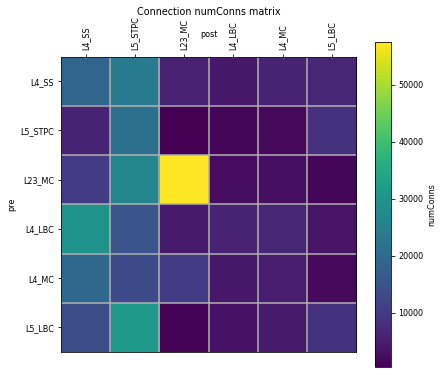

In [26]:
# features = ['numConns','convergence']
test = sim.analysis.plotConn(includePre=subPopLabels, includePost = subPopLabels, feature='numConns', figSize=(6, 6), fontSize=8, saveData=None, 
                               saveFig=True, showFig=False);

In [27]:
test[1]['connMatrix'] # total of synapses [AMPA, NMDA] or [GABAA, GABAB]

array([[19218., 24128.,  5852.,  4160.,  6174.,  6576.],
       [ 6036., 21530.,   560.,  1344.,  2072.,  8730.],
       [10528., 26640., 57486.,  2496.,  2864.,  1554.],
       [29820., 15652.,  4592.,  6214.,  6656.,  3542.],
       [19864., 13390., 10656.,  4186.,  4900.,  1940.],
       [13992., 31280.,  1008.,  3336.,  4710.,  8820.]])

In [2]:
connNumber = connData['connNumber']
synperconnNumber = connData['synperconnNumber']

i=0
for pre in subPopLabels:
    j=0
    for post in subPopLabels:
        synperconn = int(synperconnNumber[pre][post]+0.5)
        connBBP = float(connNumber[pre][post])
        connNetPyNE = test[1]['connMatrix'][i][j]/(2*synperconn)
        if pre not in Epops and post not in Epops and connBBP>30:
            print('%s->%s   -    BBP = %5.1f     NetPyNE = %5.1f   Error = %5.1f' % (pre[0:6],post[0:6],connBBP,connNetPyNE,100*(connNetPyNE-connBBP)/connBBP),'%')
        j+=1
    i+=1

Plotting 2D representation of network cell locations and connections...


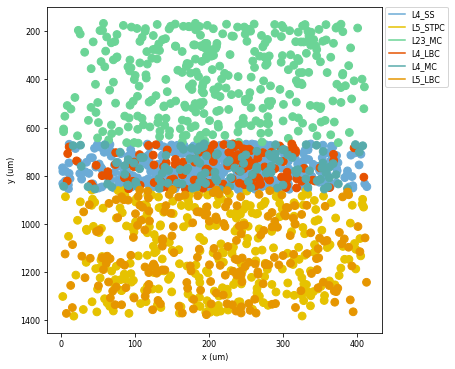

In [29]:
sim.analysis.plot2Dnet(include=subPopLabels,view='xy', showConns=False, 
                               popColors=None, tagsFile=None, figSize=(6, 6), fontSize=8, saveData=None, 
                               saveFig=True, showFig=True, lineWidth=0.1);

Plotting 2D representation of network cell locations and connections...


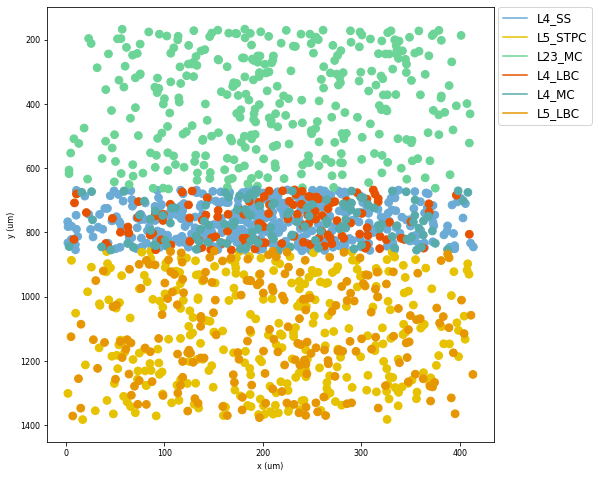

Plotting 2D representation of network cell locations and connections...


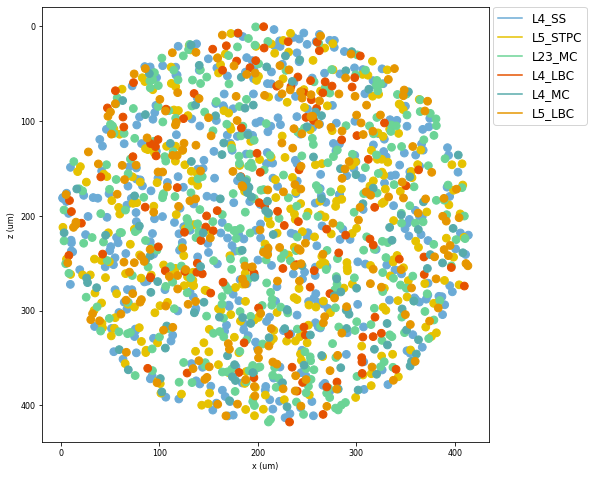

In [30]:
sim.analysis.plot2Dnet(include=subPopLabels,view='xy', showConns=False, 
                               popColors=None, tagsFile=None, figSize=(8, 8), fontSize=12, saveData=None, 
                               saveFig=None, showFig=True, lineWidth=0.1);
sim.analysis.plot2Dnet(include=subPopLabels,view='xz', showConns=False, 
                               popColors=None, tagsFile=None, figSize=(8, 8), fontSize=12, saveData=None, 
                               saveFig=None, showFig=True, lineWidth=0.1);

## Raster and traces

Plotting raster...


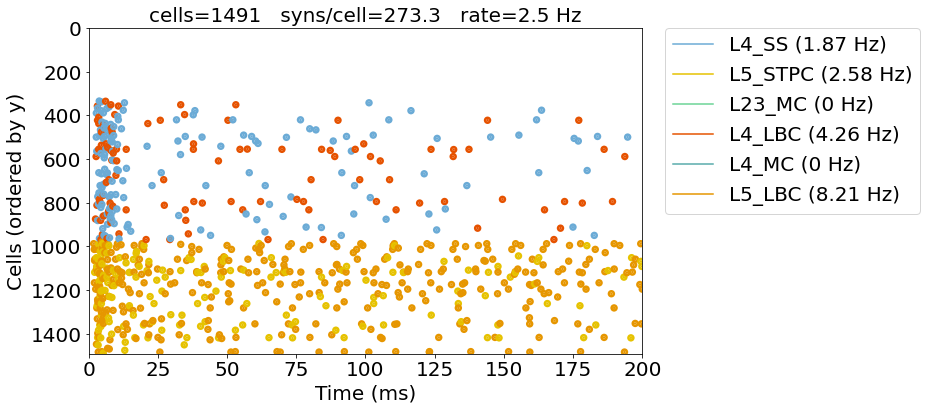

In [37]:
sim.analysis.plotRaster(include=subPopLabels, timeRange=[0,cfg.duration], orderBy='y', orderInverse=True, labels='legend', popRates=True, lw=5, marker='.', markerSize=24, figSize=(12, 6), fontSize=20, dpi=500, saveFig=True, showFig=False);

In [32]:
for metype in cfg.cellParamLabels:
    if cfg.popLabel[metype] in subPopLabels:
        print(metype,cfg.cellNumber[metype],cfg.popLabel[metype],cfg.popNumber[cfg.popLabel[metype]])     

L23_MC_bAC217 10 L23_MC 333
L23_MC_bNAC219 10 L23_MC 333
L23_MC_cACint209 270 L23_MC 333
L23_MC_cNAC187 33 L23_MC 333
L23_MC_dNAC222 10 L23_MC 333
L4_LBC_cACint209 22 L4_LBC 122
L4_LBC_cNAC187 14 L4_LBC 122
L4_LBC_cSTUT189 31 L4_LBC 122
L4_LBC_dNAC222 46 L4_LBC 122
L4_LBC_dSTUT214 9 L4_LBC 122
L4_MC_bAC217 11 L4_MC 118
L4_MC_bNAC219 4 L4_MC 118
L4_MC_cACint209 81 L4_MC 118
L4_MC_cNAC187 18 L4_MC 118
L4_MC_dNAC222 4 L4_MC 118
L4_SS_cADpyr230 406 L4_SS 406
L5_LBC_bAC217 12 L5_LBC 210
L5_LBC_cACint209 25 L5_LBC 210
L5_LBC_cIR216 13 L5_LBC 210
L5_LBC_cNAC187 37 L5_LBC 210
L5_LBC_cSTUT189 37 L5_LBC 210
L5_LBC_dNAC222 37 L5_LBC 210
L5_LBC_dSTUT214 49 L5_LBC 210
L5_STPC_cADpyr232 302 L5_STPC 302


In [33]:
traces = [(mtype, [i for i in range(0,cfg.popNumber[mtype],int(cfg.popNumber[mtype]/4.5))]) for mtype in subPopLabels]
traces

[('L4_SS', [0, 90, 180, 270, 360]),
 ('L5_STPC', [0, 67, 134, 201, 268]),
 ('L23_MC', [0, 74, 148, 222, 296]),
 ('L4_LBC', [0, 27, 54, 81, 108]),
 ('L4_MC', [0, 26, 52, 78, 104]),
 ('L5_LBC', [0, 46, 92, 138, 184])]

Plotting recorded cell traces ... trace


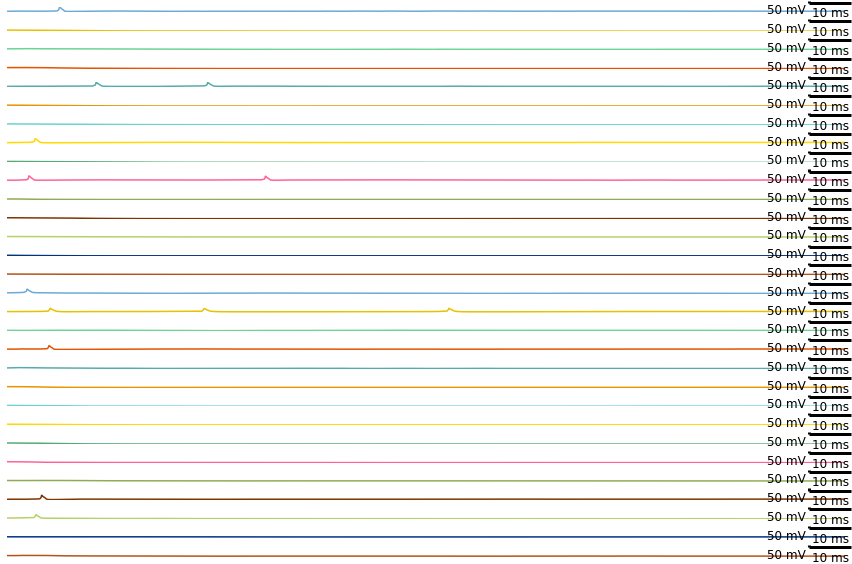

In [34]:
sim.analysis.plotTraces(include=traces, timeRange=[0,cfg.duration], overlay=False, oneFigPer='trace', ylim=[-90,50], subtitles= False, axis=False, scaleBarLoc=1, figSize=(12, 8), fontSize=12, saveFig=True);

In [35]:
subPopLabels

['L4_SS', 'L5_STPC', 'L23_MC', 'L4_LBC', 'L4_MC', 'L5_LBC']

Plotting recorded cell traces ... trace


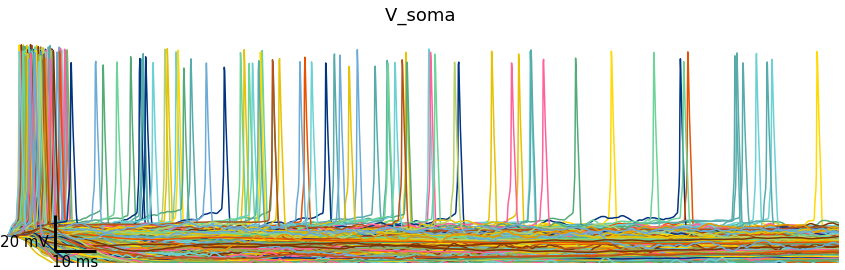

Plotting recorded cell traces ... trace


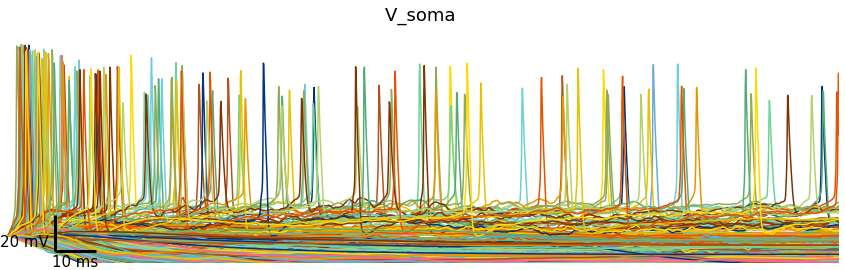

Plotting recorded cell traces ... trace


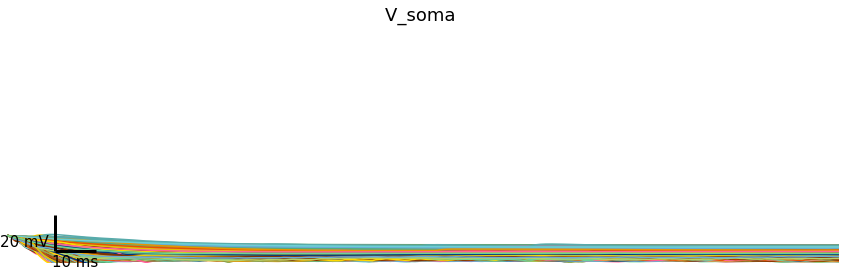

Plotting recorded cell traces ... trace


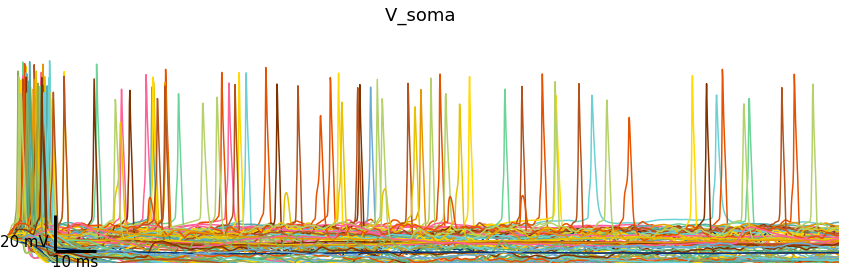

Plotting recorded cell traces ... trace


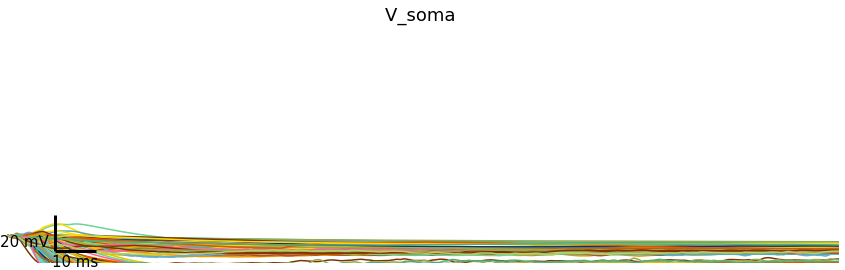

Plotting recorded cell traces ... trace


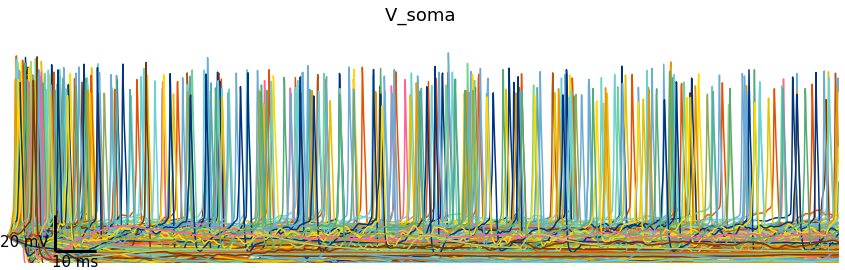

In [36]:
for pops in subPopLabels:
    sim.analysis.plotTraces(include=[pops], timeRange=[0,cfg.duration], overlay=True, oneFigPer='trace', ylim=[-80,50], axis=False, scaleBarLoc=3, figSize=(12, 4), fontSize=15, saveFig='../info/test/'+cfg.simLabel+'/'+cfg.simLabel +'_'+pops+ '_Vt.png');